# Monte Carlo Simulation for investment Planning

Monte Carlo simulation is a powerful tool for simulating investment returns and assessing risk. By introducing randomness into the model, the simulation takes into account the volatility of the investment and generates a range of potential outcomes. The resulting distribution of possible investment returns can be analyzed to calculate risk metrics such as VaR and ES, which provide a quantitative measure of the level of risk associated with the investment. These risk metrics can help investors make more informed decisions about their investment strategy.

Different distributions such as poisson, lognormal, and skew can be used to generate random rates of return within a given range. Sensitivity analysis can be used to test the robustness of the model to different parameters. Risk assessment using VaR and ES can be used to determine the probability of large losses and help investors manage their risk exposure.

Overall, Monte Carlo simulation can be a valuable tool for assessing investment risk and making data-driven decisions.

In [2]:
# This is an introduction to monte carlo simulation in python.
# Some libraries you will need
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# in order to create a simulation, let us start with a simple assumption of an investment
#using a for loop and then building on that

iv = 10000           #initial investment
years = 20          # number of years in consideration
i =.08              # rate of interest/return ( Assumption)
additions = 5000     # Extra investment every year

for year in range(years):           #fv is the final value of investment
    fv =  iv* (1+i) + additions     # Loop to find out final value after each year
    print(round(fv))
    iv = fv
    

15800
22064
28829
36135
44026
52548
61752
71692
82428
94022
106544
120067
134673
150447
167482
185881
205751
227211
250388
275419


In [4]:
# Introducing some volatily( randomness into the model) using the random function
iv = 10000              # vollatility is the indicator of changes in rate of return
i = .08
volatility = .15
years = 30
annual_addition = 5000


for year in range(years):
    market_return = np.random.normal(i, volatility)          # np.random is a way to introduce randomness into the simulation. It geneartes required return rates based on a normal distribution.
    fv = iv * (1 + market_return) + annual_addition            
    print(round(fv))
    iv = fv


15042
22026
28253
29893
40023
41656
50764
64438
72450
84718
84236
100720
71783
70705
86990
104363
114105
86726
85748
105426
129293
128386
159435
161788
205893
206350
243937
278817
276691
401391


In [5]:
sim = DataFrame()              # A function to simulate various cases
                               # Note that the interest rate here is 7% and not 8%.
iterations = 5000


for x in range(iterations):
    expected_return = .07
    volatility = .15
    time_horizon = 20
    pv = 10000
    annual_investment = 5000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        stream.append(end)
        pv = end
    sim[x] = stream


C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_3556\3590627106.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim[x] = stream
C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_3556\3590627106.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim[x] = stream
C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_3556\3590627106.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [6]:
trial=list(range(5000))
sim[trial]


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,15896.22,14507.92,14667.65,15014.31,12541.11,20176.25,16384.47,12851.52,14196.26,15423.98,...,18066.25,16197.10,15069.70,17377.96,14089.42,15375.96,16510.82,14474.15,14890.94,14269.24
1,18265.62,22240.11,20033.84,24510.06,21302.54,31079.58,24898.12,19907.38,21282.01,22066.72,...,23847.80,22258.75,22161.72,21091.93,19790.57,14177.01,20650.36,21243.55,22071.99,20465.31
2,27526.27,27941.28,30664.23,31084.40,32152.73,44316.56,28893.39,23747.40,27204.23,30255.25,...,33081.10,34332.46,31263.84,31349.39,29834.28,19834.75,29446.35,25659.95,29074.33,31475.64
3,38704.05,31493.00,27310.78,28218.53,34921.29,46197.23,34577.83,28216.63,36619.16,39793.57,...,33529.99,38585.59,36856.15,42007.21,42827.45,28864.30,41712.89,31012.30,43344.14,43454.75
4,53959.89,41128.08,33744.37,37721.97,46837.18,39749.21,38447.32,28223.15,48391.86,44026.34,...,42557.75,48726.45,46562.88,51176.14,50563.00,40104.56,65606.80,38263.86,47532.74,44960.23
5,73400.70,55487.37,35892.61,43647.78,65710.23,56591.83,49234.96,39497.29,74779.32,47532.54,...,53931.15,66549.75,58940.87,58337.25,51720.28,43958.63,93859.67,39962.36,56861.41,45248.86
6,68901.22,67831.20,44512.60,60951.46,91697.50,69543.10,56895.31,50935.64,78748.56,55637.92,...,64218.49,82789.57,61126.56,71240.85,61122.62,50643.82,107092.55,47131.94,60800.42,48483.69
7,76311.62,83845.96,65549.90,72423.33,110663.43,73762.22,58189.96,58961.17,67049.89,67306.14,...,92547.44,97767.79,52223.82,84716.97,80019.07,61896.98,124674.78,58883.92,55927.96,47531.77
8,86711.37,94869.83,66700.17,68421.44,119083.98,86428.30,65322.76,64747.67,82281.26,70744.63,...,81651.87,115214.50,59372.92,91234.98,99514.89,60197.77,101564.19,53060.01,67805.91,52044.05
9,62929.45,106493.74,61108.01,71119.34,107027.96,117594.64,79490.41,71213.72,99140.65,84765.17,...,82802.08,121842.34,53479.41,85795.87,116034.94,74141.68,133612.20,60482.55,69737.06,50009.18


In [7]:
#plt.plot(sim[trial])


In [8]:
# Some insights from the data
print("Count:", len(sim.loc[19]))
print("Mean: ", np.mean(sim.loc[19]))
print("SD: ",np.std(sim.loc[19]))
print("Max: ",np.max(sim.loc[19]))
print("Min: ", np.min(sim.loc[19]))


Count: 5000
Mean:  245049.830754
SD:  114080.11303250477
Max:  1008410.75
Min:  49642.25


In [9]:
# Some more insights
ending_values = sim.loc[19]
ending_values.describe()


count    5.000000e+03
mean     2.450498e+05
std      1.140915e+05
min      4.964225e+04
25%      1.657923e+05
50%      2.217278e+05
75%      2.973188e+05
max      1.008411e+06
Name: 19, dtype: float64

(array([  2.,   3.,  18.,  44.,  65.,  91., 118., 136., 177., 162., 200.,
        210., 230., 209., 207., 229., 202., 214., 183., 197., 166., 165.,
        158., 155., 116., 110., 123., 100.,  85.,  87.,  70.,  60.,  61.,
         65.,  65.,  51.,  45.,  34.,  36.,  33.,  34.,  18.,  23.,  24.,
         22.,  14.,  17.,  13.,   9.,  17.,  10.,   5.,   8.,   6.,  10.,
          7.,   5.,   7.,  11.,   4.,   5.,   3.,   1.,   1.,   5.,   4.,
          0.,   2.,   2.,   0.,   1.,   2.,   4.,   2.,   4.,   4.,   2.,
          3.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.]),
 array([  49642.25 ,   59229.935,   68817.62 ,   78405.305,   87992.99 ,
          97580.675,  107168.36 ,  116756.045,  126343.73 ,  135931.415,
         145519.1  ,  155106.785,  164694.47 ,  174282.155,  183869.84 ,
         193457.525,  203045.21 ,  212632.895,  222220.58 ,  231808.265,
         241395.95 ,  2509

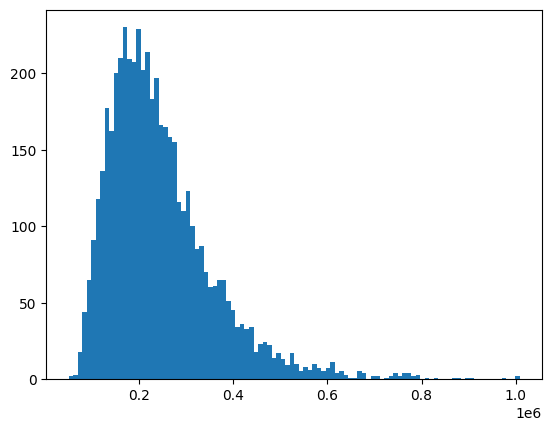

In [10]:
# Projecting the final returns as a distribution to calculate prbability of optimal returns
plt.hist(ending_values, bins=100)


In [11]:
# change the condition to gain some insight. I have tried for a million.
#Also notice that it almost represents a normal distribution.
# You can use different distributions like poisson, lognormal,skew etc to create random rates of return 
#within a given range.
a=len(ending_values[ending_values>500000]) / len(ending_values)
print(a*100)


3.34


C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_3556\1163737380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(ending_values,color='y')


Text(0, 0.5, 'Number of observations simulations factored')

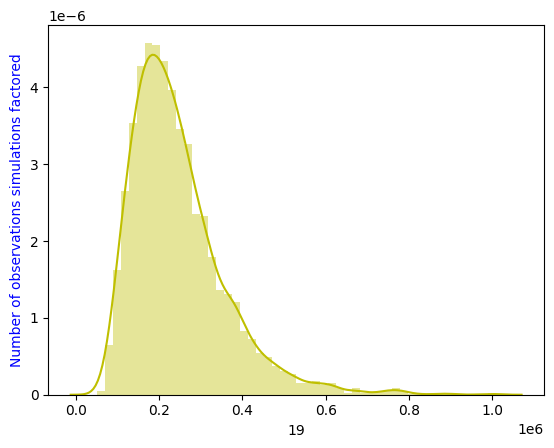

In [12]:
plot=sns.distplot(ending_values,color='y')
plot.set_ylabel('Number of observations simulations factored',color='b')


In [13]:
# scatter plot. Read the matplotlib documnetation to further modify and improve the plots.
#plt.scatter(ending_values,trial,color='r')


In [14]:
#Calculating value at risk and expected shortfalls
# Calculate VaR and ES
ending_values = sim.loc[19]
var_5 = np.percentile(ending_values, 5)
es_5 = np.mean(ending_values[ending_values <= var_5])

var_1 = np.percentile(ending_values, 1)
es_1 = np.mean(ending_values[ending_values <= var_1])

print("5% VaR: ", var_5)
print("5% ES: ", es_5)
print("1% VaR: ", var_1)
print("1% ES: ", es_1)

5% VaR:  109659.43250000001
5% ES:  94582.58476000001
1% VaR:  84939.2343
1% ES:  76690.0222


* The 5% VaR is 109943.209, it means that there is a 5% chance that the investment could lose at least 109943.209 over the time horizon.
* The 5% ES, on the other hand, shows the average loss beyond 93610.24264 if the investment falls below that threshold.
* The 1% VaR is 82379.67850000001, it means that there is a 1% chance that the investment could lose at least 82379.67850000001 over the time horizon. 
* The 1% ES shows the average loss beyond 73252.2908 if the investment falls below that threshold.